# Grabbing a Random Point from a Non-Uniform Probability Distribution
## Given a maxwell boltzman curve, this program will convert it into distribution weights and output the result.
### To use, the value *T* is the average temprature
### Adjust the value *size* depending on the location of the graph
### Adjust the value *m* depending on the mass

0.9929026325753996
[2301.30066928 3368.10203308 2354.84278318 ... 3588.33186008  523.29839626
 5862.35635813]


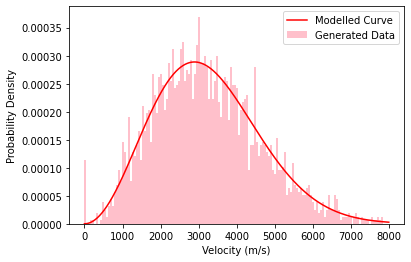

In [210]:
import matplotlib.pyplot as plt
import numpy as mp
pi = 3.1415
m = 1
a_kg = 1.66054*(10**-27)
k = 1.381*10**(-23)
T = 500
e = 2.71
size = 8000
x_c = np.linspace(0,size,num= round(.99*size))
# x_c = np.linspace(0,40000,num= 39820)

y = []
def maxwellBoltzMann(v):
    exponent = (-((.5*m*a_kg*(v**2))/(k*T)))
    term_1 = ((m*a_kg/(2*pi*k*T))**1.5)
    curve = term_1*(4*pi*(v**2)*(e**exponent))
    return curve
for i in range(len(x_c)):
    y.append(maxwellBoltzMann(x_c[i]))
    # print(((-.5*m*(v**2))/(k*T)))
print(np.sum(y))
y[i] += 1-np.sum(y)
# the sum of y had to be equal to one, but due to computer rounding errors it wasn't. I picked an interpolation that provided just under 1, and then added the remainder to the end. This was filtered out later
fig, ax = plt.subplots(1, 1)
# np.delete(x_c,(len(x_c)-1))
# np.delete(y,(len(y)-1))
# Above is the modelled curve


s = np.random.choice(x_c,p=y,size=3000)
x_c = x_c[:(len(x_c)-10)]

y= y[:(len(y)-10)]
plt.plot(x_c,y,label = 'Modelled Curve', color = 'r')

# Calculates the raw data
for i in range(len(s)):
    if(s[i] > size-100):
        s[i]= 0
# Filters out extraneous data from previous repair
print(s)
count, bins, ignored = plt.hist(s, 150, density=True, label = 'Generated Data', color = 'pink')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Probability Density')
plt.legend(loc = 'best')
# delete all particles with a velocity above 800